<a href="https://colab.research.google.com/github/YoonSungLee/AI-Innovation-Square_Vision/blob/master/Day%2010_Object%20detection%20%EC%9D%91%EC%9A%A9%20%ED%94%84%EB%A1%9C%EA%B7%B8%EB%9E%A8%20%EA%B0%9C%EB%B0%9C%ED%95%98%EA%B8%B0/FashionMnist2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import keras
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [0]:
from google.colab import auth
auth.authenticate_user()

from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
cd gdrive/My Drive/Colab Notebooks/models

/content/gdrive/My Drive/Colab Notebooks/models


In [0]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [0]:
print (train_images.shape)

(60000, 28, 28)


In [0]:
print (len(train_labels))

60000


In [0]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

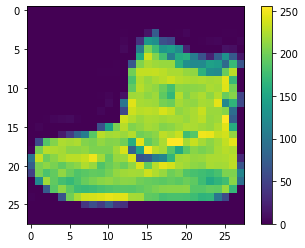

In [0]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [0]:
train_images = train_images / 255.0
test_images = test_images / 255.0

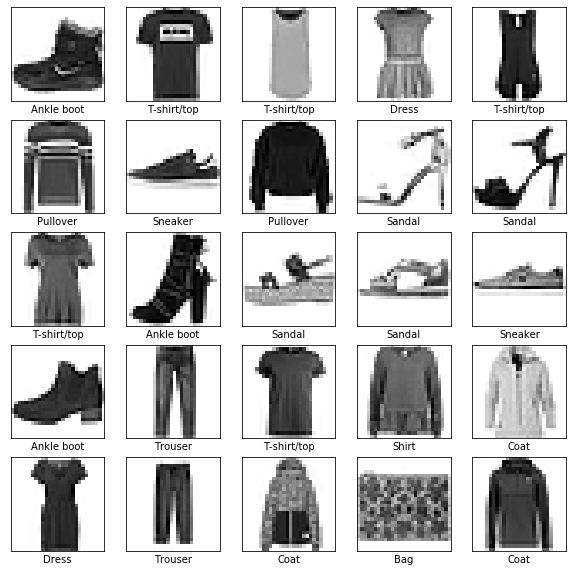

In [0]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [0]:
n_kernels = 32
model = keras.Sequential([
    # N, 28, 28, 1
    keras.layers.Conv2D(n_kernels, (3,3), activation='relu', kernel_initializer='he_normal', padding='valid', input_shape=(28, 28, 1)),
    # N, 26, 26, 32
    keras.layers.Conv2D(n_kernels*2, (3,3), activation='relu', kernel_initializer='he_normal', padding='valid'),
    # N, 24, 24, 64
    keras.layers.BatchNormalization(),
    # N, 24, 24, 64
    keras.layers.MaxPooling2D(),
    # N, 12, 12, 64
    keras.layers.Conv2D(n_kernels*2, (3,3), activation='relu', kernel_initializer='he_normal', padding='valid'),
    # N, 10, 10, 64
    keras.layers.Conv2D(n_kernels*4, (3,3), activation='relu', kernel_initializer='he_normal', padding='valid'),
    # N, 8, 8, 128
    keras.layers.BatchNormalization(),
    # N, 8, 8, 128
    keras.layers.MaxPooling2D(),
    # N, 4, 4, 128
    keras.layers.Flatten(),
    # N, 2048
    keras.layers.Dense(10, activation='softmax')
    # N, 10
])

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 64)        36928     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 128)         73856     
_________________________________________________________________
batch_normalization_2 (Batch (None, 8, 8, 128)        

In [0]:
# categorical_crossentropy : train_labels를 one-hot encoding 하고 학습 및 예측([0,1,0],[1,0,0],[1,0,0],...)
# sparse_categorical_crossentropy : train_labels를 one-hot encoding 하지 않고 변환하고 학습 및 예측(1,0,0,...)

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
filepath = "./saved-model-{epoch:02d}-{val_loss:.2f}.hdf5"
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=False, mode='max')

# filepath = "./saved-model-{epoch:02d}-{val_acc:.2f}.hdf5"
# checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=False, mode='max')

In [0]:
train_images = np.expand_dims(train_images, axis=-1)

In [0]:
log = model.fit(train_images, train_labels, validation_split=0.2,
            epochs=20,
            shuffle=True, callbacks=[checkpoint])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 18s 366us/step - loss: 0.4594 - acc: 0.8448 - val_loss: 0.4570 - val_acc: 0.8371

Epoch 00001: saving model to ./saved-model-01-0.46.hdf5
Epoch 2/20
48000/48000 [==============================] - 10s 215us/step - loss: 0.3163 - acc: 0.8901 - val_loss: 0.3852 - val_acc: 0.8768

Epoch 00002: saving model to ./saved-model-02-0.39.hdf5
Epoch 3/20
48000/48000 [==============================] - 11s 225us/step - loss: 0.2605 - acc: 0.9073 - val_loss: 0.3075 - val_acc: 0.8870

Epoch 00003: saving model to ./saved-model-03-0.31.hdf5
Epoch 4/20
48000/48000 [==============================] - 10s 218us/step - loss: 0.2255 - acc: 0.9201 - val_loss: 0.2655 - val_acc: 0.9073

Epoch 00004: saving model to ./saved-model-04-0.27.hdf5
Epoch 5/20
48000/48000 [==============================] - 11s 223us/st

In [0]:
train_labels.shape

(60000,)

In [0]:
history_dict = log.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

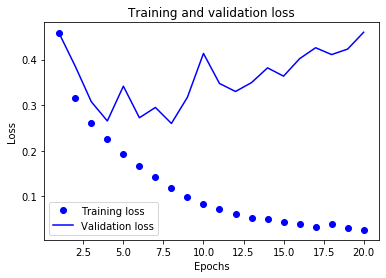

In [0]:
import matplotlib.pyplot as plt

acc = log.history['acc']
val_acc = log.history['val_acc']
loss = log.history['loss']
val_loss = log.history['val_loss']

epochs = range(1, len(acc) + 1)

# ‘bo’는 파란색 점을 의미합니다
plt.plot(epochs, loss, 'bo', label='Training loss')
# ‘b’는 파란색 실선을 의미합니다
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

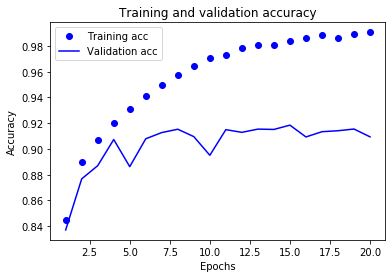

In [0]:
plt.clf()   # 그래프를 초기화합니다
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [0]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\n테스트 정확도:', test_acc)


테스트 정확도: 0.871


Make Prediction

In [0]:
predictions = model.predict(test_images)

In [0]:
print (predictions[0])

[1.6575233e-07 8.8925010e-09 6.2656365e-09 1.2328996e-09 8.6471301e-09
 1.7198850e-03 2.5931200e-07 3.0939369e-02 3.0299884e-07 9.6733999e-01]


In [0]:
np.argmax(predictions[0])

9

In [0]:
test_labels[0]

9

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

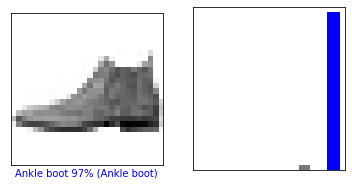

In [0]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

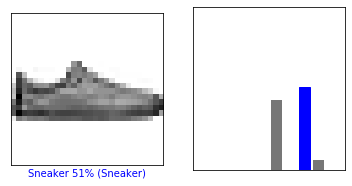

In [0]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

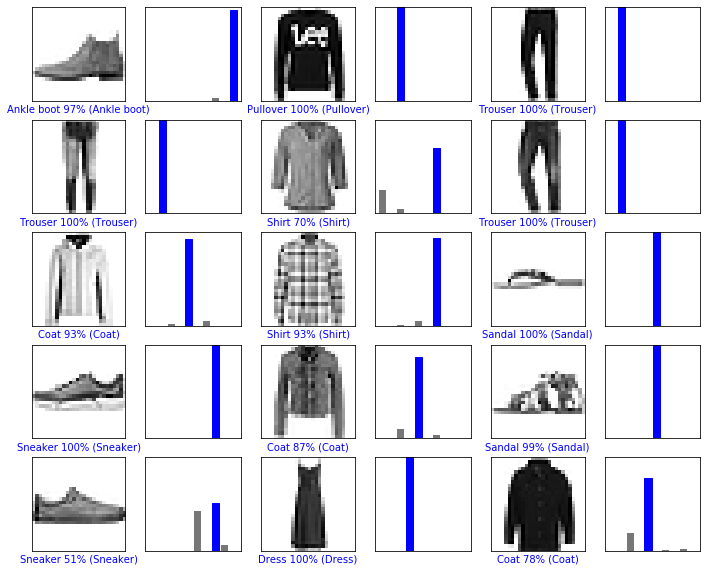

In [0]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()